In [1]:
from skimage.io import imread, imsave, imshow
from skimage.data import cells3d
import napari_mahotas_image_processing as nmh 
import numpy as np

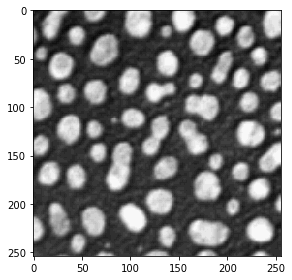

In [2]:
blobs = imread('https://samples.fiji.sc/blobs.png')
imshow(blobs)

## Gaussian blur

c:\structure\code\napari-time-slicer\src\napari_time_slicer\__init__.py:41: UserWarning: No viewer provided, cannot read current time point.
  warnings.warn("No viewer provided, cannot read current time point.")
C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


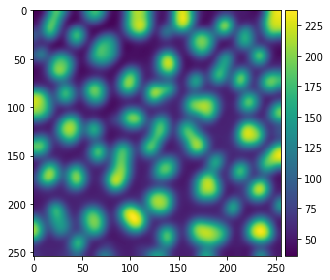

In [3]:
blurred = nmh.gaussian_blur(blobs, sigma=5)
imshow(blurred)

## Thresholding

C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


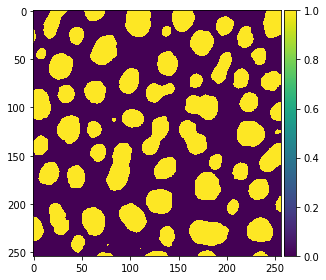

In [4]:
binary = nmh.threshold_otsu(blobs)
imshow(binary * 1)

## Labeling

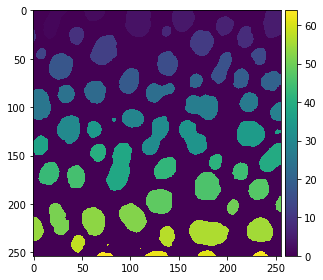

In [5]:
labeled = nmh.connected_component_labeling(binary)
imshow(labeled)

## Sobel operator

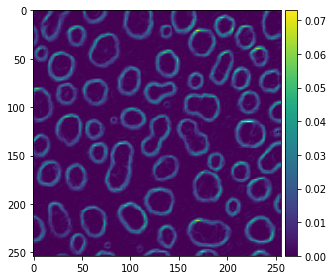

In [6]:
edges = nmh.sobel_edge_detector(blobs)
imshow(edges)

## Fill holes

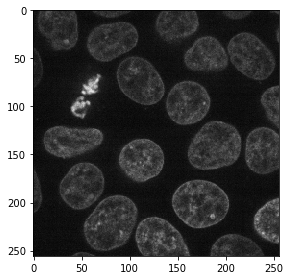

In [7]:
cells = cells3d()

nuclei = cells[30, 1]
imshow(nuclei)

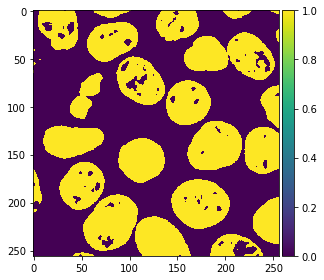

In [8]:
binary_cells = nmh.threshold_otsu(nmh.gaussian_blur(nuclei))
imshow(binary_cells * 1)

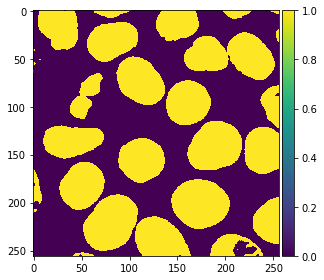

In [9]:
filled = nmh.binary_fill_holes(binary_cells)
imshow(filled * 1)

## Seeded watershed

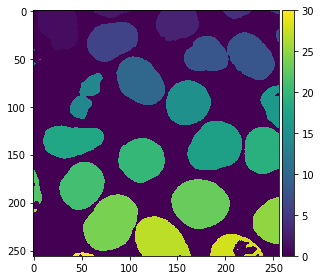

In [10]:
seeds = nmh.connected_component_labeling(filled)
imshow(seeds)

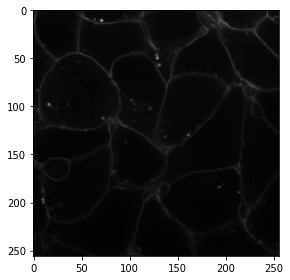

In [11]:
membranes = cells[30, 0]
imshow(membranes)

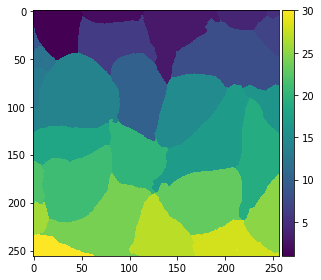

In [12]:
labels = nmh.seeded_watershed(membranes, seeds)
imshow(labels)

## Distance Map

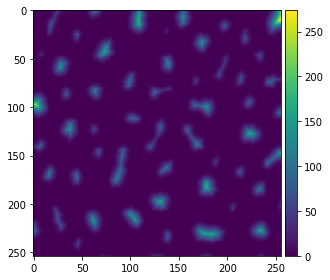

In [13]:
distance_map = nmh.euclidean_distance_map(binary)
imshow(distance_map)

## Split touching objects

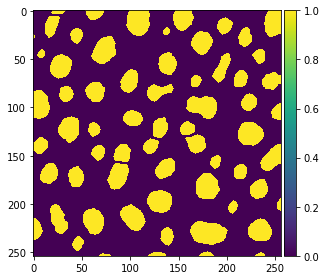

In [14]:
split = nmh.split_touching_objects(binary)
imshow(split * 1)

## Voronoi-Otsu-Labeling

image = blobs
spot_sigma = 2
outline_sigma = 2

blurred_spots = mh.gaussian_filter(image, spot_sigma)
spot_centroids = mh.locmax(blurred_spots)

blurred_outline = mh.gaussian_filter(image, outline_sigma)
binary_otsu = threshold_otsu(blurred_outline)

remaining_spots = spot_centroids * binary_otsu

labeled_spots, num_labes = mh.label(remaining_spots)
labels = mh.cwatershed(binary_otsu, labeled_spots) # * binary_otsu


imshow(labels)

### ... doesn't work :-( yet :-)